C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4867 - loss: 1.4614 - val_accuracy: 0.7715 - val_loss: 0.6243
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7456 - loss: 0.6814 - val_accuracy: 0.8170 - val_loss: 0.4958
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7708 - loss: 0.6124 - val_accuracy: 0.8295 - val_loss: 0.4558
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8161 - loss: 0.4843
Test accuracy: 0.8161333203315735


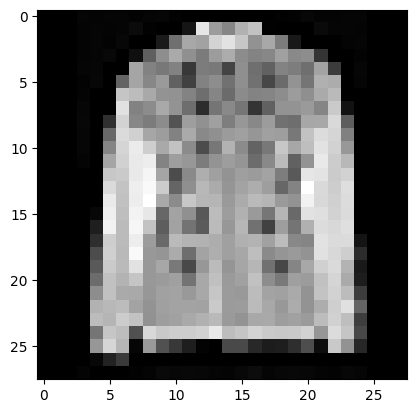

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
Prediction: coat


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CSV data
def load_data(csv_path, image_size=(28, 28), label_column='label'):
    data = pd.read_csv(csv_path)
    labels = data[label_column].values  # Extract labels
    images = data.drop(columns=[label_column]).values  # Drop label column and get pixel values
    images = images.reshape(-1, image_size[0], image_size[1], 1).astype('float32')  # Reshape to 28x28 and add channel
    images /= 255.0  # Normalize pixel values to [0, 1]
    return images, labels

# Paths to your train and test CSV files
train_csv_path = r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\5 Fashion MNIST\fashion-mnist_test.csv"  
test_csv_path = r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\5 Fashion MNIST\fashion-mnist_train.csv" 
# Load training and test data
X_train, y_train = load_data(train_csv_path)
X_test, y_test = load_data(test_csv_path)

# One-hot encode the labels
num_classes = len(np.unique(y_train))  # Detect number of unique classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential()

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape of 28x28x1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with number of neurons equal to number of classes and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Visualize a test image and its predicted label
class_names = [f"Class {i}" for i in range(num_classes)]  # Replace with actual class names if known
n = 5  # Index of the image to visualize
plt.imshow(X_test[n].reshape(28, 28), cmap='gray')
plt.show()

predicted_value = model.predict(X_test)
pred = np.argmax(predicted_value[n])
fashion = ['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot'] 
idx = (int)(class_names[pred][-1])
print('Prediction:', fashion[idx])

Epoch 1/3


C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.5892 - loss: 1.1391 - val_accuracy: 0.8205 - val_loss: 0.4835
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.8082 - loss: 0.5417 - val_accuracy: 0.8650 - val_loss: 0.3870
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.8442 - loss: 0.4430 - val_accuracy: 0.8735 - val_loss: 0.3521
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8593 - loss: 0.3855
Test accuracy: 0.8597999811172485


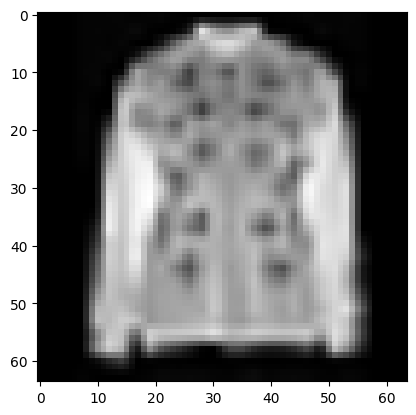

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step
Prediction: coat


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.image import resize

# Load the CSV data with resized images
def load_data(csv_path, target_size=(64, 64), label_column='label'):
    data = pd.read_csv(csv_path)
    labels = data[label_column].values  # Extract labels
    images = data.drop(columns=[label_column]).values  # Drop label column and get pixel values
    images = images.reshape(-1, 28, 28, 1).astype('float32')  # Original shape (28x28) with 1 color channel
    images = resize(images, size=target_size)  # Resize images to target resolution (64x64)
    images /= 255.0  # Normalize pixel values to [0, 1]
    return images, labels

# Paths to your train and test CSV files
train_csv_path = r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\5 Fashion MNIST\fashion-mnist_test.csv"  
test_csv_path = r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\5 Fashion MNIST\fashion-mnist_train.csv" 
# Load training and test data
X_train, y_train = load_data(train_csv_path)
X_test, y_test = load_data(test_csv_path)

# One-hot encode the labels
num_classes = len(np.unique(y_train))  # Detect number of unique classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential()

# Update input shape to 64x64 due to increased image resolution
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))

# Add a MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with number of neurons equal to number of classes and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Visualize a test image and its predicted label
class_names = [f"Class {i}" for i in range(num_classes)]  # Replace with actual class names if known
n = 5  # Index of the image to visualize

# Convert the TensorFlow tensor to a NumPy array before reshaping
plt.imshow(np.array(X_test[n]).reshape(64, 64), cmap='gray')
plt.show()

predicted_value = model.predict(X_test)
pred = np.argmax(predicted_value[n])
fashion = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] 
idx = int(class_names[pred][-1])
print('Prediction:', fashion[idx])